Raw data loaded. Total rows: 16126

--- Analysis: Disaster Subgroup ---
Missing data (NaN) ratio: 0.00%
Number of unique classes: 6

Class Distribution (Value Counts):
Disaster Subgroup
Hydrological         0.392348
Meteorological       0.316259
Geophysical          0.115156
Biological           0.099095
Climatological       0.077080
Extra-terrestrial    0.000062
Name: proportion, dtype: float64

--- Analysis: Disaster Type ---
Missing data (NaN) ratio: 0.00%
Number of unique classes: 15

Class Distribution (Value Counts):
Disaster Type
Flood                   0.344227
Storm                   0.278804
Earthquake              0.095746
Epidemic                0.093079
Landslide               0.048121
Drought                 0.047749
Extreme temperature     0.037393
Wildfire                0.029207
Volcanic activity       0.016433
Insect infestation      0.005953
Name: proportion, dtype: float64


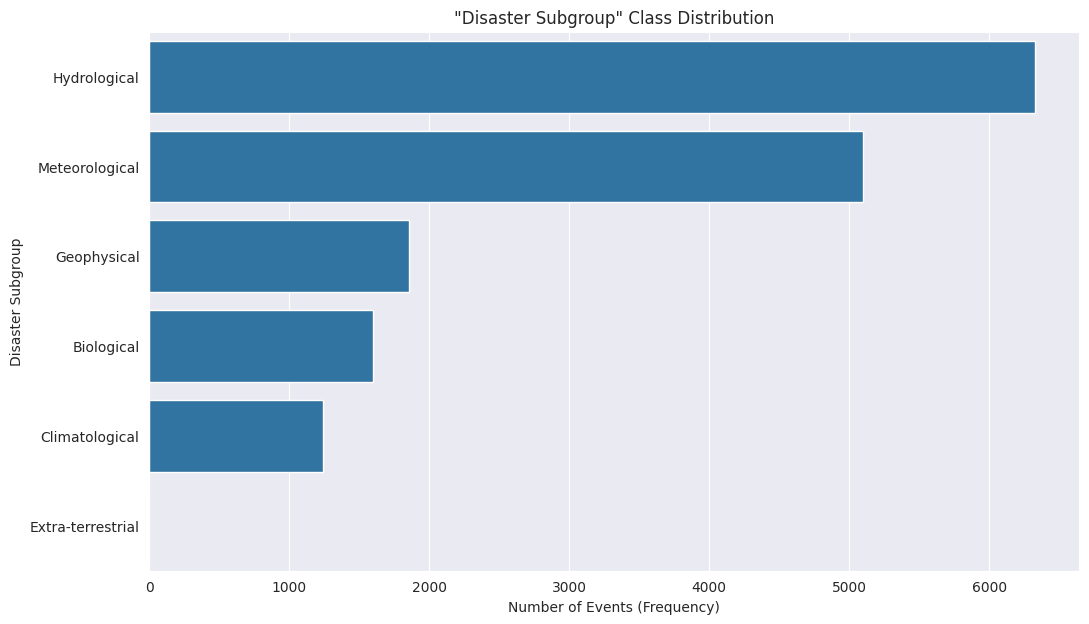

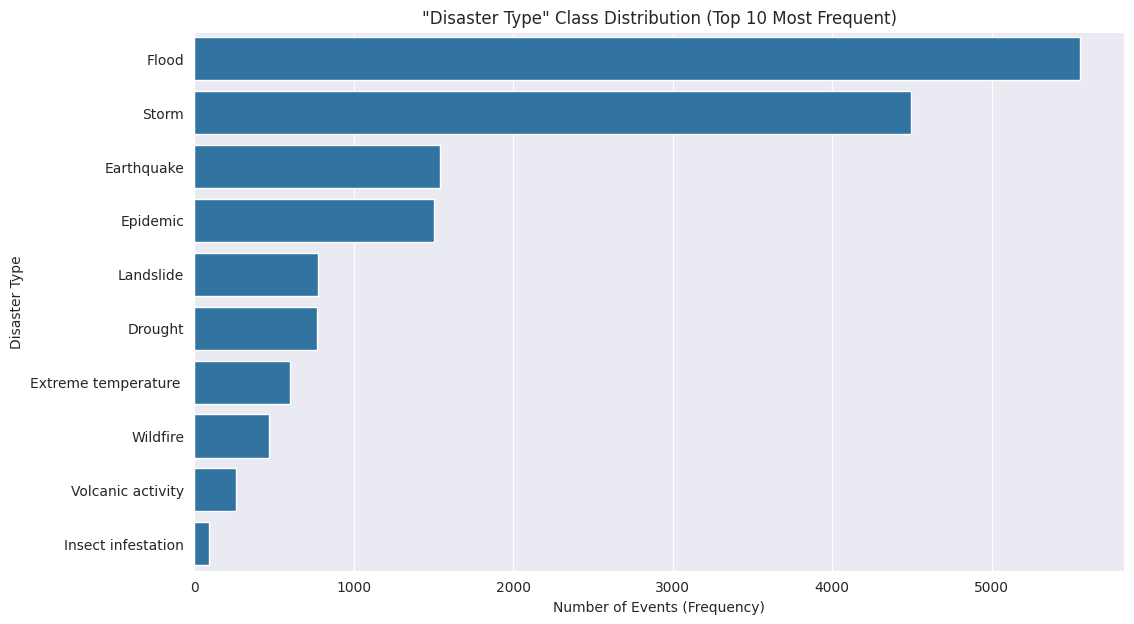

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading ---
# Reload the raw data from the main directory (../)
file_path = "../1900_2021_DISASTERS.xlsx - emdat data.csv"
try:
    df_raw = pd.read_csv(file_path)
    print(f"Raw data loaded. Total rows: {len(df_raw)}")
except FileNotFoundError:
    print(f"ERROR: '{file_path}' not found. Please check the path.")
    # raise

# --- 2. Analyzing Potential Targets (y) ---

# Target A: Disaster Subgroup (Mid-level)
target_a = 'Disaster Subgroup'
print(f"\n--- Analysis: {target_a} ---")
print(f"Missing data (NaN) ratio: {df_raw[target_a].isnull().mean() * 100:.2f}%")
print(f"Number of unique classes: {df_raw[target_a].nunique()}")
print("\nClass Distribution (Value Counts):")
print(df_raw[target_a].value_counts(normalize=True).head(10))


# Target B: Disaster Type (More specific)
target_b = 'Disaster Type'
print(f"\n--- Analysis: {target_b} ---")
print(f"Missing data (NaN) ratio: {df_raw[target_b].isnull().mean() * 100:.2f}%")
print(f"Number of unique classes: {df_raw[target_b].nunique()}")
print("\nClass Distribution (Value Counts):")
print(df_raw[target_b].value_counts(normalize=True).head(10))

# --- 3. Visualization (Most Frequent) ---

# For Disaster Subgroup
plt.figure(figsize=(12, 7))
sns.countplot(
    y=df_raw[target_a],
    order=df_raw[target_a].value_counts().index
)
plt.title(f'"{target_a}" Class Distribution')
plt.xlabel('Number of Events (Frequency)')
plt.show()

# For Disaster Type (Might be too crowded, showing top 10)
plt.figure(figsize=(12, 7))
sns.countplot(
    y=df_raw[target_b],
    order=df_raw[target_b].value_counts().nlargest(10).index
)
plt.title(f'"{target_b}" Class Distribution (Top 10 Most Frequent)')
plt.xlabel('Number of Events (Frequency)')
plt.show()

Available rows for classification analysis: 16126.


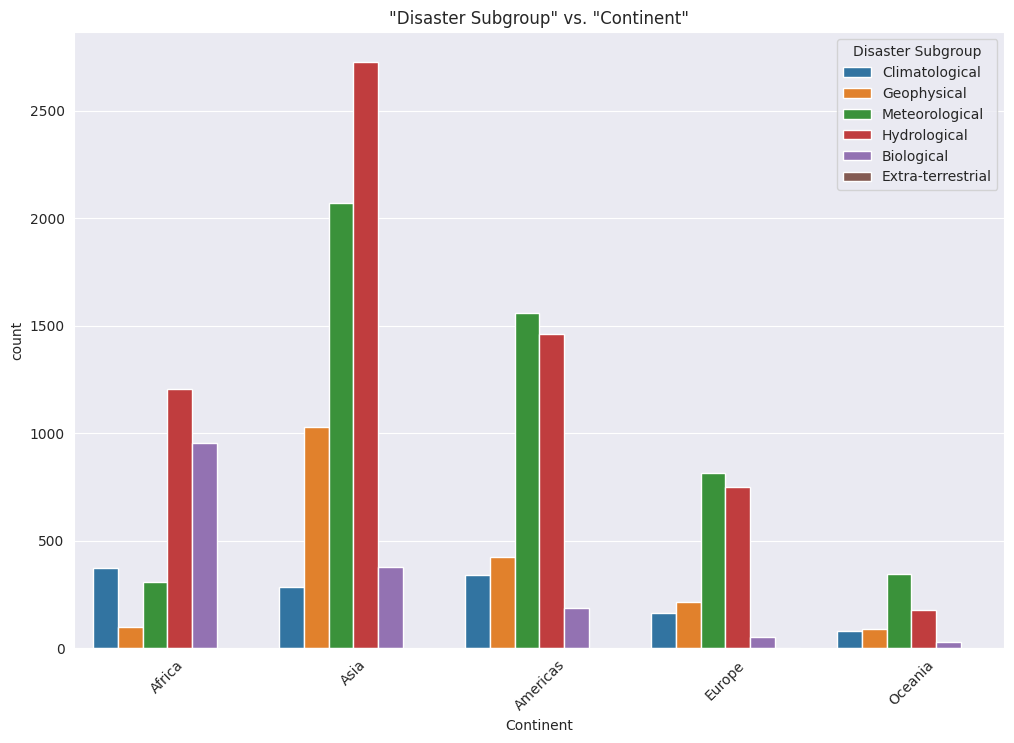

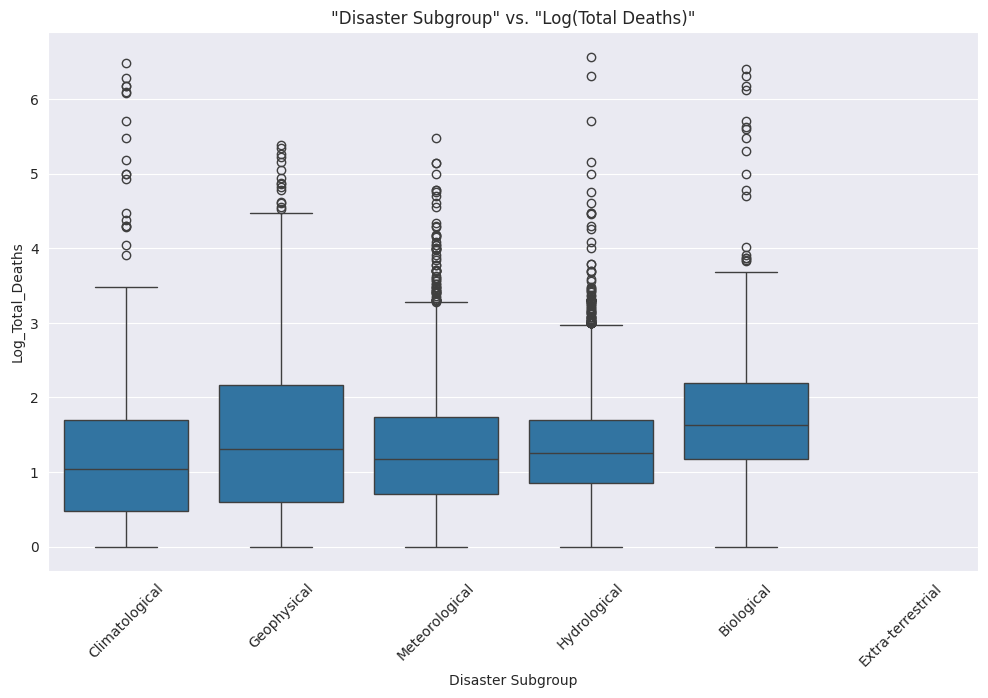

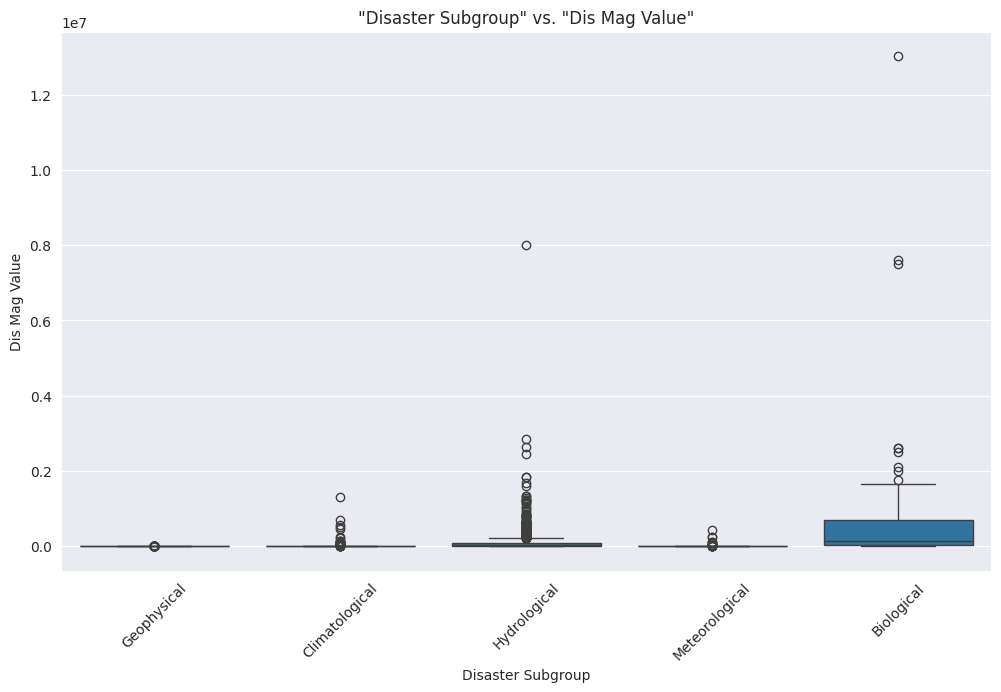

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Loading ---
file_path = "../1900_2021_DISASTERS.xlsx - emdat data.csv"
try:
    df_raw = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"ERROR: '{file_path}' not found. Please check the path.")
    # raise

# --- 2. Data Preparation (For Problem 2) ---

# STRATEGIC DECISION: Our target (y) is 'Disaster Subgroup'
target = 'Disaster Subgroup'

# Keep only the rows where the target column is not NaN
# (We are NOT touching Total Damages like in Problem 1)
df_clean = df_raw.dropna(subset=[target])

print(f"Available rows for classification analysis: {len(df_clean)}.")

# Features we will examine
categorical_feature = 'Continent'
numerical_feature_1 = 'Total Deaths'
numerical_feature_2 = 'Dis Mag Value' # Disaster Magnitude (e.g., Richter)

# --- 3. Visualization: Categorical Feature vs. Target ---
# Distribution of disaster subgroups by continent
plt.figure(figsize=(12, 8))
sns.countplot(
    data=df_clean,
    x=categorical_feature,
    hue=target # <- KEY POINT: Separate each continent by the target
)
plt.title(f'"{target}" vs. "{categorical_feature}"')
plt.xticks(rotation=45)
plt.legend(title=target, loc='upper right')
plt.show()

# --- 4. Visualization: Numerical Features vs. Target (Box Plot) ---

# Total Deaths
# Note: Total Deaths (like damage) might be skewed, so we apply Log transformation
df_clean['Log_Total_Deaths'] = np.log10(df_clean[numerical_feature_1].replace(0, 1e-6))
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_clean, x=target, y='Log_Total_Deaths')
plt.title(f'"{target}" vs. "Log(Total Deaths)"')
plt.xticks(rotation=45)
plt.show()

# Dis Mag Value (Disaster Magnitude)
# (This column contains Richter, F_Scale, etc., let's clean up NaNs)
df_mag_clean = df_clean.dropna(subset=[numerical_feature_2])
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_mag_clean, x=target, y=numerical_feature_2)
plt.title(f'"{target}" vs. "{numerical_feature_2}"')
plt.xticks(rotation=45)
plt.show()